<a href="https://colab.research.google.com/github/mandamattosg/Analise-Goodreads/blob/main/An%C3%A1lise_de_Dados_de_Livros_GoodReads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados de Livros - GoodReads**

Este projeto visa a prática de SQL e Análise de Dados.

A base de dados utilizada foi a Goodreads-books presente em: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks

Esses dados, disponibilizados por "jealousleopard" no Kaggle, foram coletados a partir da API pública do Goodreads. No entanto, desde 8 de dezembro de 2020, o Goodreads deixou de emitir novas chaves de desenvolvedor para sua API pública, o que significa que não há atualizações recentes provenientes diretamente do Goodreads.

Ferramentas utilizadas: SQLite, Python, Pandas, Matplotlib, Seaborn, NumPy, Scikit-Learn

In [1]:
# Instalação de bibliotecas
!pip install pandas

In [34]:
# Importação de biblitoecas
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

O upload dos arquivos foi realizado manualmente de forma local, mas também pode ser feito através do Google Drive.

In [132]:
# Leitura do arquivo csv
df = pd.read_csv('books.csv', on_bad_lines='skip')

# Exibe as primeiras linhas
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
# Cria conexão com banco SQLite em memória
conn = sqlite3.connect(':memory:')

# Salva o DataFrame como uma tabela SQL
df.to_sql('books', conn, index=False, if_exists='replace')


11123

# **Consultas:**

Os 10 autores com mais livros publicados:





In [48]:
query = """
SELECT authors, COUNT(*) AS total_books
FROM books
GROUP BY authors
ORDER BY total_books DESC
LIMIT 10;
"""

df_authors = pd.read_sql_query(query, conn)
df_authors

,authors,total_books
0,Stephen King,40
1,P.G. Wodehouse,40
2,Rumiko Takahashi,39
3,Orson Scott Card,35
4,Agatha Christie,33
5,Piers Anthony,30
6,Sandra Brown,29
7,Mercedes Lackey,29
8,Dick Francis,28
9,Terry Pratchett,23


Livros com maior número de avaliações e boa nota:

In [120]:
query = """
SELECT title, authors, average_rating, ratings_count
FROM books
WHERE average_rating >= 4.0
ORDER BY ratings_count DESC
LIMIT 10;
"""

df_goodbooks = pd.read_sql_query(query, conn)
df_goodbooks

,title,authors,average_rating,ratings_count
0,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,2530894
1,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,2339585
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,2293963
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,2153167
4,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,2128944
5,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,2095690
6,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,1766725
7,The Giver (The Giver #1),Lois Lowry,4.13,1585589
8,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,1516367
9,Little Women,Louisa May Alcott,4.07,1479727


Frequência de notas:

In [111]:
query = """
SELECT average_rating, COUNT(*) AS frequency
FROM books
GROUP BY average_rating
ORDER BY frequency DESC;
"""

df_ratings = pd.read_sql_query(query, conn)
df_ratings

,average_rating,frequency
0,4.00,219
1,3.96,195
2,4.02,178
3,3.94,176
4,4.07,172
...,...,...
204,2.55,1
205,2.50,1
206,2.40,1
207,2.33,1


Autores com maior média de avaliação (mínimo 5 livros para filtro):

In [112]:
query = """
SELECT authors,
       ROUND(AVG(average_rating), 2) AS avg_rating,
       COUNT(*) AS total_books
FROM books
GROUP BY authors
HAVING total_books >= 5
ORDER BY avg_rating DESC
LIMIT 5;
"""

df_goodauthors = pd.read_sql_query(query, conn)
df_goodauthors

,authors,avg_rating,total_books
0,Bill Watterson,4.71,7
1,Hiromu Arakawa/Akira Watanabe,4.57,12
2,Hiromu Arakawa/荒川弘/方郁仁,4.56,8
3,J.K. Rowling/Mary GrandPré,4.55,6
4,Hiromu Arakawa,4.55,5


Top editoras com mais livros publicados:


In [89]:
query = """
SELECT publisher, COUNT(*) AS total_books
FROM books
GROUP BY publisher
ORDER BY total_books DESC
LIMIT 10;
"""

df_publishers = pd.read_sql_query(query, conn)
df_publishers

,publisher,total_books
0,Vintage,318
1,Penguin Books,261
2,Penguin Classics,184
3,Mariner Books,150
4,Ballantine Books,144
5,HarperCollins,112
6,Harper Perennial,112
7,Pocket Books,111
8,Bantam,110
9,VIZ Media LLC,88


Distribuição da quantidade de livros por idioma:

In [106]:
query = """
SELECT language_code, COUNT(*) AS total_books
FROM books
GROUP BY language_code
ORDER BY total_books DESC
LIMIT 5;
"""

df_language = pd.read_sql_query(query, conn)
df_language

,language_code,total_books
0,eng,8908
1,en-US,1408
2,spa,218
3,en-GB,214
4,fre,144


# **Análises:**

/tmp/ipython-input-138-2125960832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_authors, y='authors', x='total_books', palette='viridis')


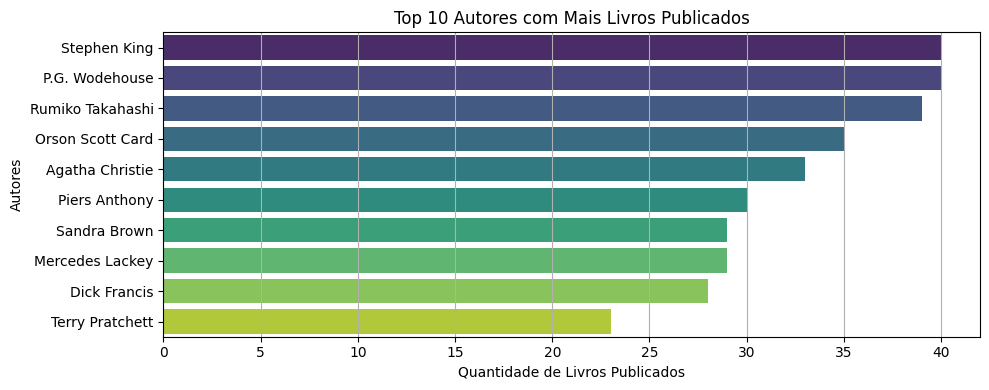

In [138]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_authors, y='authors', x='total_books', palette='viridis')
plt.title('Top 10 Autores com Mais Livros Publicados')
plt.xlabel('Quantidade de Livros Publicados')
plt.ylabel('Autores')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-121-687343855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_goodbooks, y='title', x='ratings_count', palette='viridis')


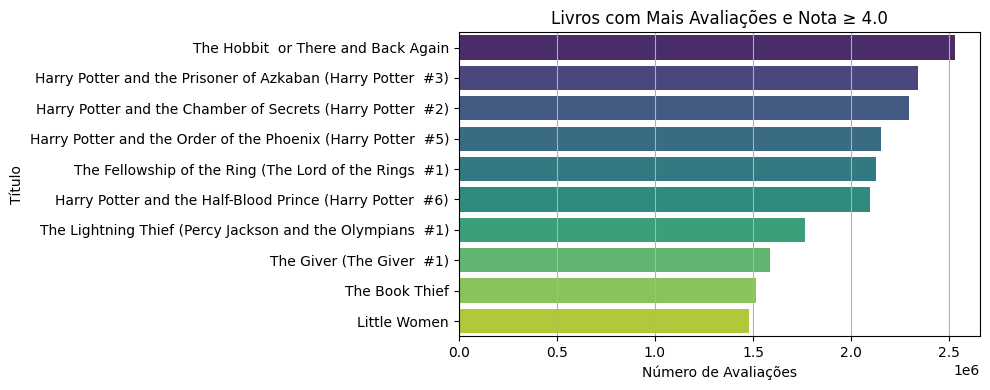

In [121]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_goodbooks, y='title', x='ratings_count', palette='viridis')
plt.title('Livros com Mais Avaliações e Nota ≥ 4.0')
plt.xlabel('Número de Avaliações')
plt.ylabel('Título')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

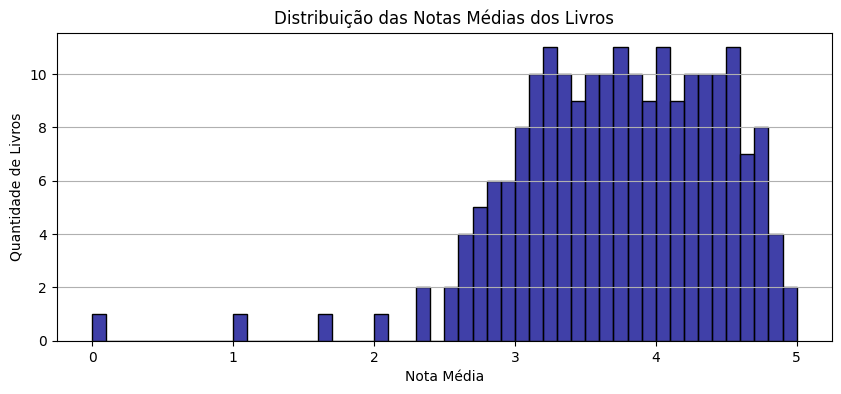

In [117]:
plt.figure(figsize=(10, 4))
sns.histplot(df_ratings['average_rating'], bins=50, kde=False, color='darkblue')
plt.title('Distribuição das Notas Médias dos Livros')
plt.xlabel('Nota Média')
plt.ylabel('Quantidade de Livros')
plt.grid(axis='y')
plt.show()

In [113]:
df_goodauthors_renamed = df_goodauthors.rename(columns={
    'authors': 'Autor',
    'avg_rating': 'Avaliação Média',
    'total_books': 'Total de Livros'
})

df_goodauthors_renamed.style.set_caption("Top 5 Autores com Melhor Avaliação Média (mínimo 5 livros)") \
    .format({
        'Avaliação Média': '{:.2f}',
        'Total de Livros': '{:,}'
    }) \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#40466e'), ('color', 'white'), ('font-size', '14px')]},
        {'selector': 'td', 'props': [('font-size', '12px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}
    ])


,Autor,Avaliação Média,Total de Livros
0,Bill Watterson,4.71,7
1,Hiromu Arakawa/Akira Watanabe,4.57,12
2,Hiromu Arakawa/荒川弘/方郁仁,4.56,8
3,J.K. Rowling/Mary GrandPré,4.55,6
4,Hiromu Arakawa,4.55,5


/tmp/ipython-input-140-3989982207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_publishers, y='publisher', x='total_books', palette='viridis')


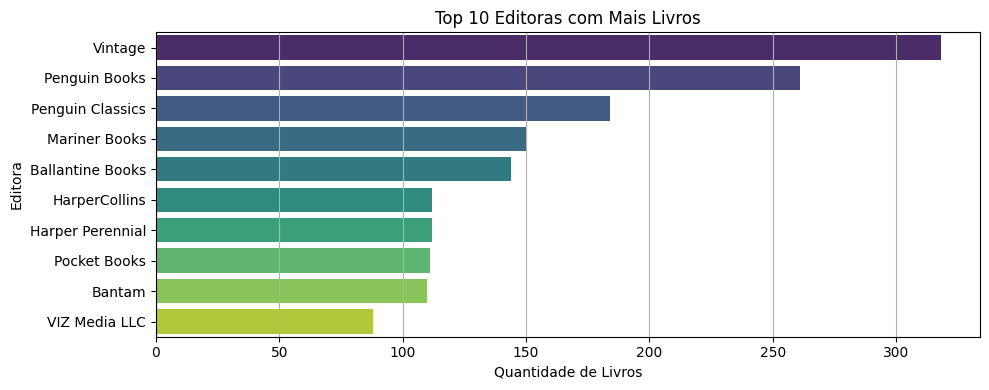

In [140]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_publishers, y='publisher', x='total_books', palette='viridis')
plt.title('Top 10 Editoras com Mais Livros')
plt.xlabel('Quantidade de Livros')
plt.ylabel('Editora')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-119-2087150056.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_language_grouped, x='language_normalized', y='total_books', palette='viridis')


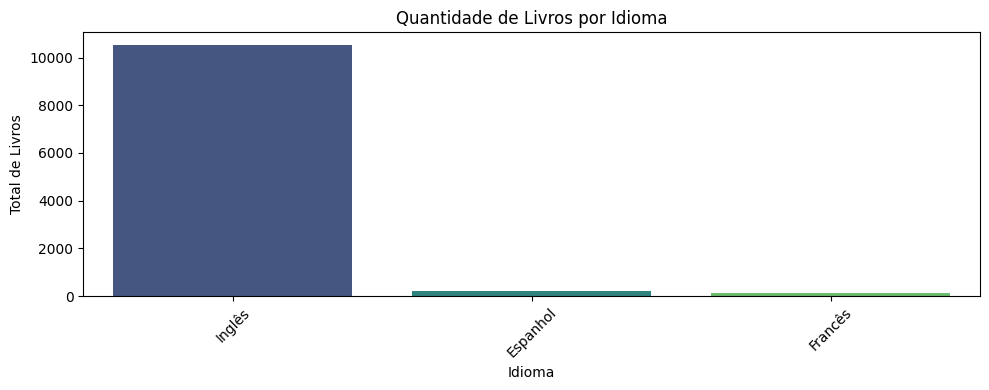

In [119]:
def normalize_language(code): # Função para agrupar os tipo de inglês
    if code.startswith('en'):
        return 'Inglês'
    elif code.startswith('es') or code == 'spa':
        return 'Espanhol'
    elif code.startswith('fr') or code == 'fre':
        return 'Francês'
    else:
        return code

df_language['language_normalized'] = df_language['language_code'].apply(normalize_language)

# Soma por idioma normalizado
df_language_grouped = df_language.groupby('language_normalized')['total_books'].sum().reset_index()
df_language_grouped = df_language_grouped.sort_values(by='total_books', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(data=df_language_grouped, x='language_normalized', y='total_books', palette='viridis')
plt.title('Quantidade de Livros por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Total de Livros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

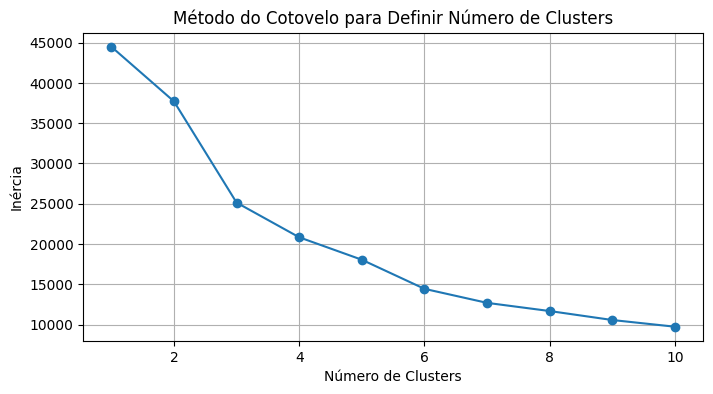

In [134]:
# Análise de clusters de livros por perfil
features = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
df_cluster = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Definir Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

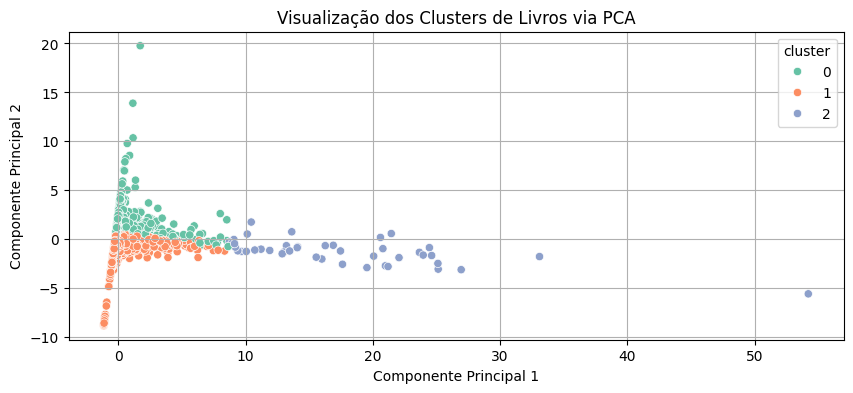

,average_rating,num_pages,ratings_count,text_reviews_count
cluster,,,,
0,4.12,680.83,19562.61,611.36
1,3.89,254.86,10490.97,378.16
2,4.07,394.09,1458235.59,30597.95


In [136]:
k = 3  # Escolha com base no gráfico acima
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['pca_1'] = X_pca[:, 0]
df_cluster['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(10,4))
sns.scatterplot(data=df_cluster, x='pca_1', y='pca_2', hue='cluster', palette='Set2')
plt.title('Visualização dos Clusters de Livros via PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()
df_cluster.groupby('cluster')[features].mean().round(2)


# **Conclusões:**

A análise dos dados da base de livros revelou insights interessantes sobre o mercado editorial e o perfil dos autores:

- Autores com maior produção: Os 10 autores com mais livros publicados destacam-se pela produtividade, refletindo grande engajamento e potencial influência no mercado. Empatados em 1º lugar estão Stephen King e P. G. Wodehouse.

- Popularidade e qualidade: Os livros melhores avaliados e com grande volume de avaliações demonstram que títulos bem recebidos pelo público conseguem atingir alta popularidade. Destacam-se sagas famosas como Harry Potter, Percy Jackson, O Hobbit e Senhor dos Anéis.

- Distribuição das avaliações: A maioria dos livros recebe notas entre 3.5 e 4.5, indicando uma tendência geral de avaliações positivas, com uma parcela menor de obras excepcionais (nota 5).

- Autores melhor avaliados: Quando consideramos apenas autores com pelo menos 5 livros, os 5 com maior avaliação média mostram que é possível manter alta qualidade mesmo com volume significativo de publicações.

- Editoras mais presentes: As 10 editoras com mais livros publicados são nomes conhecidos no mercado editorial. O destaque vai para Vintage, Penguin Books e Penguin Classics.

- Idiomas dos livros: A predominância de livros em inglês reflete o foco geográfico e cultural da base analisada.

- Separação de perfis: A análise de clusters identificou 3 perfis de livros:
1) Livros grandes e bem avaliados, com popularidade média. Provavelmente obras densas que agradam ao público fiel.
2) Livros curtos, menos avaliados e com nota abaixo da média. Possivelmente obras menos conhecidas ou com menor engajamento.
3) Livros altamente populares e amplamente resenhados. Provavelmente best-sellers, livros de autores famosos, ou títulos que viralizaram nas redes. Apesar de não terem a nota mais alta, são muito lidos e comentados.

Esses insights podem guiar decisões editoriais, estratégias de marketing, e recomendações personalizadas para leitores, alinhando qualidade, quantidade e popularidade.